In [2]:
import torch
from torch.nn import functional as F
from torch import nn
from pytorch_lightning.core.lightning import LightningModule
import pytorch_lightning as pl

import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from src.models import *
from src.dataloader import *
from src.utils import *

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import pickle
import json

import matplotlib.pyplot as plt

In [2]:
ds_train_sr = pickle.load(open('/home/jupyter/data/saved_datasets/testdataset_single_forecast_tp_pure_sr_first_days_5.pkl','rb'))
ds_train = pickle.load(open('/home/jupyter/data/saved_datasets/testdataset_single_forecast_tp_log_trans_first_days_5.pkl', 'rb'))


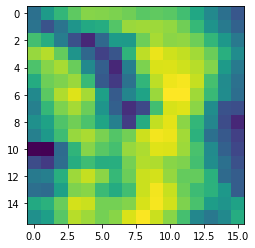

In [13]:
plt.imshow(ds_train[0][0].squeeze())

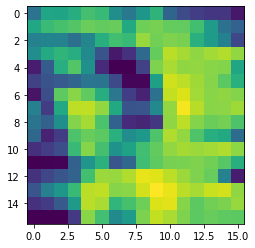

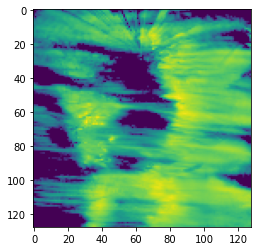

In [11]:
plt.figure()
plt.imshow(ds_train_sr[0][0].squeeze())
plt.figure()
plt.imshow(ds_train_sr[0][1].squeeze())

In [8]:
ds = pickle.load(open('/home/jupyter/data/saved_datasets/testdataset_ensemble_forecast_x10_random_extra_vars_TCW_log_trans_padded_24_first_days_5.pkl', 'rb'))


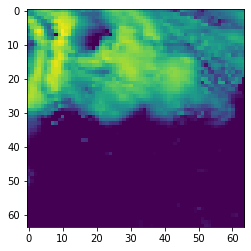

In [16]:
plt.imshow(ds[0][0][0,:,:])
# ds[0][0].shape

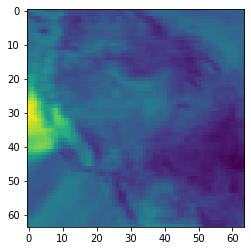

In [17]:
plt.imshow(ds[0][0][1,:,:])

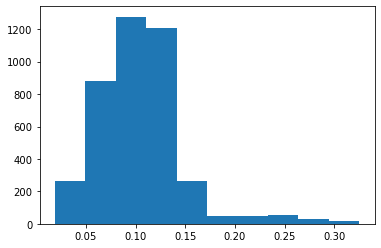

In [22]:
plt.hist(np.reshape(ds[0][0][1,:,:], -1));

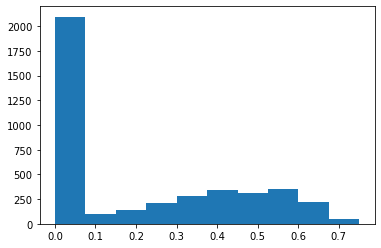

In [23]:
plt.hist(np.reshape(ds[0][0][0,:,:], -1));

In [1]:
import torch
from torch.nn import functional as F
from torch import nn
from pytorch_lightning.core.lightning import LightningModule
import pytorch_lightning as pl

import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from src.models import *
from src.dataloader import *
from src.utils import *

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import pickle
import json

## Train and Val

In [2]:
data_dir = '/home/jupyter/data/'

In [3]:
args = {'tigge_dir':data_dir + f'tigge/32km/',
    'tigge_vars':['total_precipitation'], #,'total_column_water'],#, '2m_temperature', 'convective_available_potential_energy', 'convective_inhibition'],
    'mrms_dir':data_dir + f'mrms/4km/RadarOnly_QPE_06H/',
    'rq_fn':data_dir + f'mrms/4km/RadarQuality.nc',
#     'const_fn':data_dir + 'tigge/32km/constants.nc',
#     'const_vars':['orog', 'lsm'],
    'data_period':('2018-01', '2018-02'),
    'val_days':5,
    'split':'train',
#     'pure_sr_ratio':8, 
    'tp_log':0.01, 
#     'ensemble_mode':'random',
    'pad_tigge':10, 
     'pad_tigge_channel': True
    }

dataset_name = 'ensemble_forecast_x10_random_log_trans_padded_24'

In [4]:
ds_train = TiggeMRMSDataset(**args)

/opt/conda/envs/ilan/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data


(1, 16, 16)
(1, 16, 16)


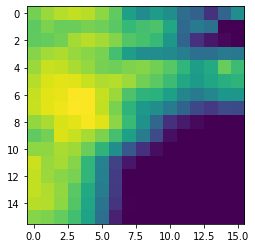

In [5]:
plt.imshow(ds_train[1][0][0])

(1, 16, 16)
(1, 16, 16)


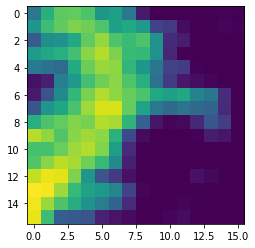

In [6]:
plt.imshow(ds_train[1][0][1])